# Purpose of the notebook

- Think of rasterio as numpy array 
- Identify the coordinates of a specific pixel
- Extract the band's value of a specific pixel

In [18]:
import os
import numpy as np
os.getcwd()

'/Users/wentingjiang/PycharmProjects/image'

## Read data from one image

In [4]:
os.getcwd()

'/Users/wentingjiang/PycharmProjects/image'

In [5]:
from __future__ import division
import math
import rasterio # everything in rasterio is represented in numpy array

# the image has been selected from the website: https://landsatlook.usgs.gov/sentinel2/viewer.html
image_file = "Area of interest_rgb.tif"

satdat = rasterio.open(image_file) 

In [6]:
# find out about the bounding box: coordinates for each corner in the picture
print(satdat.bounds) 

BoundingBox(left=23.59484308897556, bottom=37.74493603597384, right=23.833384756405557, top=37.95535270331384)


In [7]:
# Get dimensions, in map units (using the example GeoTIFF, that's meters)
# to detemrine the surface area

width_in_projected_units = satdat.bounds.right - satdat.bounds.left
height_in_projected_units = satdat.bounds.top - satdat.bounds.bottom

print("Width: {}, Height: {}".format(width_in_projected_units, height_in_projected_units))

Width: 0.23854166742999894, Height: 0.21041666733999875


In [9]:
# This dataset's projection uses meters as distance units.
# find out how many meters are there in a pixel?

xres = (satdat.bounds.right - satdat.bounds.left) / satdat.width
yres = (satdat.bounds.top - satdat.bounds.bottom) / satdat.height

print(xres, yres)
print("Are the pixels square: {}".format(xres == yres))

0.0010416666699999953 0.0010416666699999938
Are the pixels square: False


In [10]:
satdat

<open DatasetReader name='Area of interest_rgb.tif' mode='r'>

## Extract info about the bands

#### Important! In a raster dataset, each pixel has a value. Pixels are arranged in a grid, and pixels representing equivalent info have the same value, even if they are not in the same location



## Visualization

In [11]:
from matplotlib import pyplot as plt

In [12]:
# Load the 3 bands into 2d arrays - recall that we previously learned PlanetScope band order is BGRN.
r, g, b, i = satdat.read()

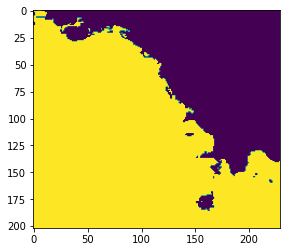

In [13]:
# Use imshow to load the blue band.
fig = plt.imshow(i)

# Display the results.
plt.show()

In [27]:
i.shape

(202, 229)

(array([16263.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 29995.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

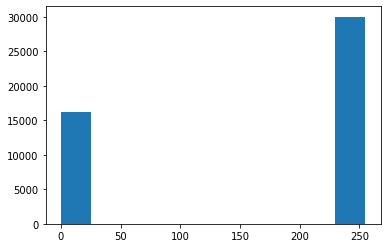

In [29]:
# so there are only two values, each represent either land or water

plt.hist(i.flatten())